In [106]:
import pandas as pd

corpus_fake = pd.read_csv("../dataset/Fake.csv")
corpus_true = pd.read_csv("../dataset/True.csv")
corpus_fake["label"] = [1] * corpus_fake.shape[0]
corpus_true["label"] = [0] * corpus_true.shape[0]
all_data = corpus_fake.append(corpus_true)
all_data

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [160]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
lemmetizer = WordNetLemmatizer()
corputs_of_words = {}
tokenizer = RegexpTokenizer(r"\w+")
all_words=set()
word_to_index = {}
text = all_data.text.values.tolist()
i=0   
for t in text:
    words = [lemmetizer.lemmatize(w.lower()) for w in tokenizer.tokenize(t) if w is not w.isdigit()]
    for w in words:
        if w not in word_to_index.keys():
            all_words.add(w)
            word_to_index[w] = i
            i+=1
titles = all_data.title.values.tolist()
for t in titles:
    words = [lemmetizer.lemmatize(w.lower()) for w in tokenizer.tokenize(t) if w is not w.isdigit()]
    for w in words:
         if w not in word_to_index.keys():
            all_words.add(w)
            word_to_index[w] = i
            i+=1


Data analysis and visualization

In [28]:
print("Total true news "+str(corpus_true.shape[0]))
print("Total fake news "+str(corpus_fake.shape[0]))

all_data.shape[0]

Total true news 21417
Total fake news 23481


44898

In [90]:
from nltk import ngrams
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
lemmetizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r"\w+")
text_prepared = [[lemmetizer.lemmatize(w.lower()) for w in tokenizer.tokenize(t) if w is not w.isdigit()] for t in all_data.text.values.tolist()]
titles_prepared = [[lemmetizer.lemmatize(w.lower()) for w in tokenizer.tokenize(t) if w is not w.isdigit()] for t in all_data.title.values.tolist()]
text_prepared_fake = [[lemmetizer.lemmatize(w.lower()) for w in tokenizer.tokenize(t) if w is not w.isdigit()] for t in corpus_fake.text.values.tolist()]
text_prepared_true = [[lemmetizer.lemmatize(w.lower()) for w in tokenizer.tokenize(t) if w is not w.isdigit()] for t in corpus_true.text.values.tolist()]


In [125]:
documents_lenghts = []
  
for t in text_prepared:  
    documents_lenghts.append(len(t))

documents_lenghts_true = []
for t in text_prepared_true:
    documents_lenghts_true.append(len(t))

    
documents_lenghts_fake = []
for t in text_prepared_fake:
    documents_lenghts_fake.append(len(t))   


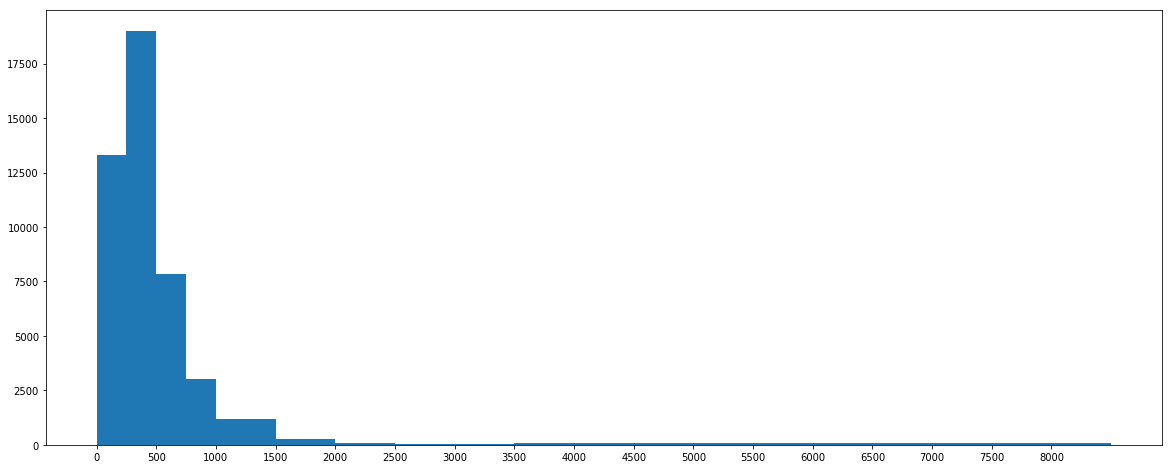

In [121]:
import numpy as np
import matplotlib.pyplot as plt

_ = plt.figure(figsize = (20,8))
plt.hist(documents_lenghts, bins=[0,250,500,750,1000,1500,2000,2500,3000,3500,8500])
plt.xticks(np.arange(min(documents_lenghts), max(documents_lenghts)+1, 500.0))
plt.show()

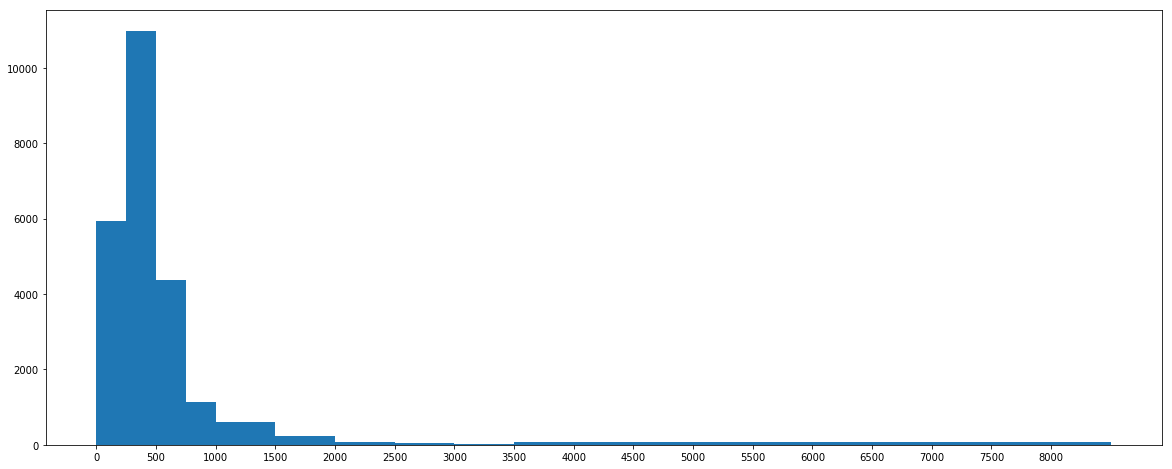

In [126]:
import numpy as np
import matplotlib.pyplot as plt

_ = plt.figure(figsize = (20,8))
plt.hist(documents_lenghts_fake, bins=[0,250,500,750,1000,1500,2000,2500,3000,3500,8500])
plt.xticks(np.arange(min(documents_lenghts_fake), max(documents_lenghts_fake)+1, 500.0))
plt.show()

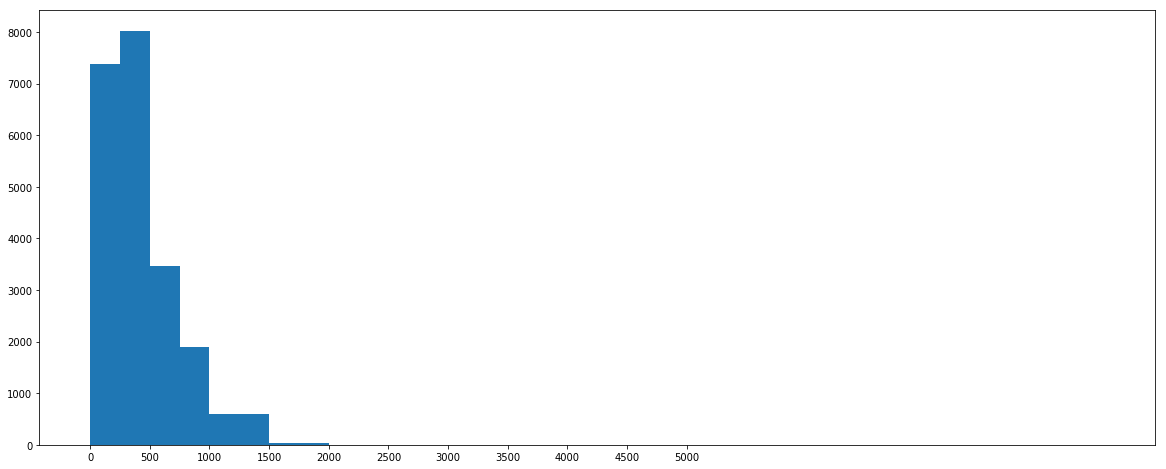

In [127]:
import numpy as np
import matplotlib.pyplot as plt

_ = plt.figure(figsize = (20,8))
plt.hist(documents_lenghts_true, bins=[0,250,500,750,1000,1500,2000,2500,3000,3500,8500])
plt.xticks(np.arange(min(documents_lenghts_true), max(documents_lenghts_true)+1, 500.0))
plt.show()

In [128]:
boundary = 700
print(f"Percetage of texts that has fewer of 1000 words -all data- {len([x for x in documents_lenghts if x <= boundary])*100/len(documents_lenghts)}")
print(f"Percetage of texts that has fewer of 1000 words - fake corpus- {len([x for x in documents_lenghts_fake if x <= boundary])*100/len(documents_lenghts_fake)}")
print(f"Percetage of texts that has fewer of 1000 words - true corpus- {len([x for x in documents_lenghts_true if x <= boundary])*100/len(documents_lenghts_true)}")

Percetage of texts that has fewer of 1000 words -all data- 87.23996614548533
Percetage of texts that has fewer of 1000 words - fake corpus- 88.89314765129254
Percetage of texts that has fewer of 1000 words - true corpus- 85.42746416398188


<h1>Creating n-grams and tf-idf features</h1>

In [152]:
# unigrams = ngrams(text_prepared, 1)
biigrams = [list(ngrams(t, 2)) for t in text_prepared]
# three_grams = ngrams(text_prepared, 3)
# four_grams = ngrams(text_prepared, 3)

KeyboardInterrupt: 

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(vocabulary = all_words ,stop_words = 'english',ngram_range = (2,2))


In [165]:
vectors = vectorizer.fit_transform([" ".join(t) for t in text_prepared])

In [ ]:
fature_names = vectorizer.get_feature_names()
vectors_list = vectors.todense().tolist()
df = pd.DataFrame(vectors_list,columns=feature_names)
df.head()

In [25]:
import os
import pickle


def replace_short_phrases(t):
    for key in contractions:
        t = t.replace(key,contractions[key])
    return t

def load_embeddings(file_name, vocabulary):
 
    embeddings = dict()
    with open(file_name, 'r', encoding='utf-8') as doc:
            line = doc.readline()
            while line != '':
                line = line.rstrip('\n').lower()
                parts = line.split(' ')
                vals = np.array(parts[1:], dtype=np.float)
                if parts[0] in vocabulary:
                     embeddings[parts[0]] = vals
                line = doc.readline()
    return embeddings

def load_embedding_weights(vocabulary, embedding_size):
        if os.path.exists('Glove/embedding_matrix.pkl'):
            with open('Glove/embedding_matrix.pkl', 'rb') as f:
                 embedding_matrix = pickle.load(f)
        else:
            print('Creating embedding weights...')
            embeddings = load_embeddings(f'Glove/glove.6B.{embedding_size}d.txt',
             vocabulary)
            embedding_matrix = np.zeros((len(vocabulary), embedding_size))
            for i in range(len(vocabulary)):
                if vocabulary[i] in embeddings.keys():
                    embedding_matrix[i] = embeddings[vocabulary[i]]
                else:
                    embedding_matrix[i] = np.random.standard_normal(embedding_size)
            with open('Glove/embedding_matrix.pkl', 'wb') as f:
                pickle.dump(embedding_matrix, f)
        return embedding_matrix

In [22]:

contractions = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}